<a href="https://colab.research.google.com/github/PittPrat/ResnetSymmetry/blob/master/Copy_of_ImageCompositionTechnique_Multimodal_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.fftpack import fft2, fftshift
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# Set dataset path (All images in one folder)
dataset_path = "/content/drive/MyDrive/symmetry_dataset/"
image_paths = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(".jpg")]

Mounted at /content/drive


In [ ]:
# Preprocessing Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32



# Load and preprocess images
images = np.array([preprocess_image(img) for img in image_paths])
print(f"Loaded {len(images)} images.")

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Unable to read image {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure correct color format
    image = cv2.resize(image, (224, 224))
    image = image.astype("float32") / 255.0
    return np.expand_dims(image, axis=0)

def compute_fourier_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Warning: Unable to process Fourier features for {image_path}")
        return None
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.log1p(np.abs(f_shift))
    magnitude_spectrum_resized = cv2.resize(magnitude_spectrum, (224, 224))
    return magnitude_spectrum_resized.flatten()

Loaded 0 images.


In [ ]:
# Save Fourier Features for Future Use
fourier_features_path = "/content/drive/MyDrive/Output/fourier_features.pkl"
features_flattened = fourier_features.reshape(fourier_features.shape[0], -1)
with open(fourier_features_path, "wb") as f:
    pickle.dump(features_flattened, f)
print(f"Fourier features saved at: {fourier_features_path}")


In [ ]:
# Load saved fourier features
import pickle
fourier_features_path = "/content/drive/MyDrive/Output/fourier_features.pkl"
# Load Fourier Features (if needed)
def load_fourier_features(file_path):
    with open(file_path, "rb") as f:
        return pickle.load(f)

fourier_features = load_fourier_features(fourier_features_path)
print("Loaded Fourier features shape:", fourier_features.shape)

Loaded Fourier features shape: (1027, 50176)


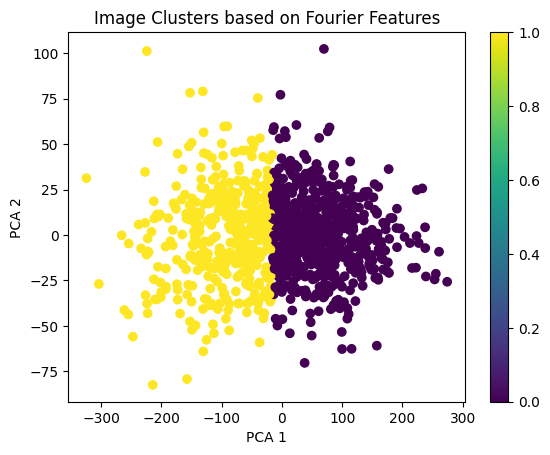

Found 823 images belonging to 2 classes.
Found 204 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 605s 23s/step - accuracy: 0.5543 - loss: 0.7865 - val_accuracy: 0.5294 - val_loss: 0.6630
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 243s 9s/step - accuracy: 0.6327 - loss: 0.6443 - val_accuracy: 0.7304 - val_loss: 0.5995
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 256s 10s/step - accuracy: 0.6408 - loss: 0.6287 - val_accuracy: 0.6471 - val_loss: 0.6239
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 256s 10s/step - accuracy: 0.6906 - loss: 0.5589 - val_accuracy: 0.7451 - val_loss: 0.5795
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 248s 10s/step - accuracy: 0.7428 - loss: 0.5563 - val_accuracy: 0.7157 - val_loss: 0.5809
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 255s 10s/step - accuracy: 0.7337 - loss: 0.5390 - val_accuracy: 0.7353 - val_loss: 0.5681
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 276s 11s/step - accuracy: 0.7489 - loss: 0.5223 - val_accuracy: 0.7353 - val_loss: 0.5644
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 267s 10s/step - accuracy: 0.7698 - loss: 0.5137 - val_accuracy: 0.7

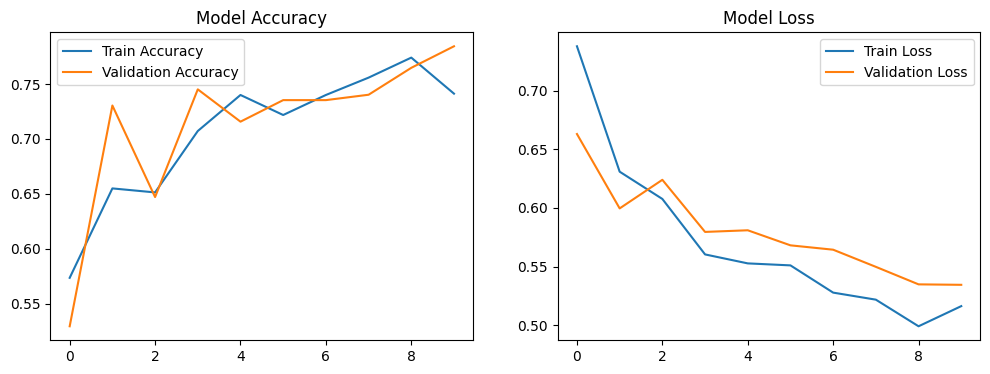

Model saved at: /content/drive/MyDrive/Output/symmetry_classification_model.h5


NameError: name 'preprocess_image' is not defined

In [ ]:

features_flattened = fourier_features.reshape(fourier_features.shape[0], -1)

# Apply K-Means Clustering
num_clusters = 2  # Symmetric & Asymmetric
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(features_flattened)

# Visualizing Clusters with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_flattened)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Image Clusters based on Fourier Features")
plt.colorbar()
plt.show()

# Create labeled directories
os.makedirs("/content/drive/MyDrive/Output/Symmetric", exist_ok=True)
os.makedirs("/content/drive/MyDrive/Output/Asymmetric", exist_ok=True)

# Move images into respective clusters
for img_path, label in zip(image_paths, kmeans_labels):
    label_folder = "Symmetric" if label == 0 else "Asymmetric"
    os.rename(img_path, f"/content/drive/MyDrive/Output/{label_folder}/{os.path.basename(img_path)}")

# Load Auto-Labeled Data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/Output/",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)
val_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/Output/",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

# Load Pretrained ResNet50
base_model = ResNet50(weights="imagenet", include_top=False, pooling="avg", input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Define Model with Custom Classification Head
model = Sequential([
    base_model,
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary classification
])

# Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    verbose=1
)

# Evaluate Model
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy:.2f}")

# Plot Training Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

# Save Model for Download
model_save_path = "/content/drive/MyDrive/Output/symmetry_classification_model.h5"
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")


In [ ]:

# Predict on New Image
def predict_image(image_path):
    img = preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    label = "Symmetric" if prediction >= 0.5 else "Asymmetric"
    print(f"Prediction for {image_path}: {label}")

# Example Usage
sample_image = "/content/drive/MyDrive/Test Resnet/TestOne.jpg"
predict_image(sample_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction for /content/drive/MyDrive/Test Resnet/TestOne.jpg: Symmetric


In [ ]:
# Define Test Data Path
test_data_path = "/content/drive/MyDrive/Test data/"

# Create an ImageDataGenerator for test set (No Augmentation, Just Rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False  # No shuffling for test evaluation
)

# Print Number of Test Images
print(f"Loaded {test_data.samples} test images.")


Found 16 images belonging to 2 classes.
Loaded 16 test images.


In [ ]:
# Evaluate model on test dataset
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Final Test Accuracy: {test_accuracy:.2f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3750 - loss: 1.0499
Final Test Accuracy: 0.38


In [ ]:
def load_test_images(test_data_path):
    test_images = []
    test_labels = []
    file_names = [f for f in os.listdir(test_data_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for file_name in file_names:
        image_path = os.path.join(test_data_path, file_name)
        if not os.path.isfile(image_path):
            continue

        img_processed = preprocess_image(image_path)
        fourier_feature = compute_fourier_features(image_path)

        if img_processed is not None and fourier_feature is not None:
            test_images.append((img_processed, fourier_feature.reshape(1, 50176)))
            test_labels.append(0)  # Dummy label

    return test_images, test_labels


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Accuracy: 0.44
Precision: 0.00
Recall: 1.00
F1 Score: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.00      0.00      0.00         0

    accuracy                           0.44        18
   macro avg       0.50      0.22      0.31        18
weighted avg       1.00      0.44      0.62        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


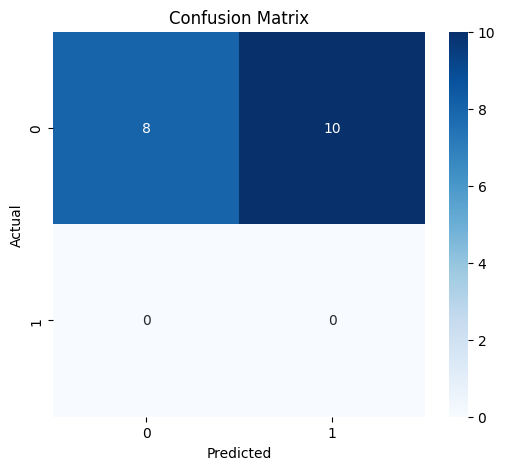

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

test_images, test_labels = load_test_images(test_data_path)

# Convert test data to arrays
test_x_images = np.vstack([img[0] for img in test_images]).astype(np.float32)
test_x_fourier = np.vstack([img[1] for img in test_images]).astype(np.float32)
test_x_fourier = test_x_fourier.reshape(len(test_x_fourier), 50176)  # Ensure correct shape
test_y = np.array(test_labels)

# Make predictions
predictions = model.predict([test_x_images, test_x_fourier])
predicted_classes = (predictions >= 0.5).astype(int).flatten()

# Compute metrics
accuracy = accuracy_score(test_y, predicted_classes)
precision = precision_score(test_y, predicted_classes, zero_division=1)
recall = recall_score(test_y, predicted_classes, zero_division=1)
f1 = f1_score(test_y, predicted_classes, zero_division=1)
conf_matrix = confusion_matrix(test_y, predicted_classes)
report = classification_report(test_y, predicted_classes)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

